# Dataset modification

(309700, 75)


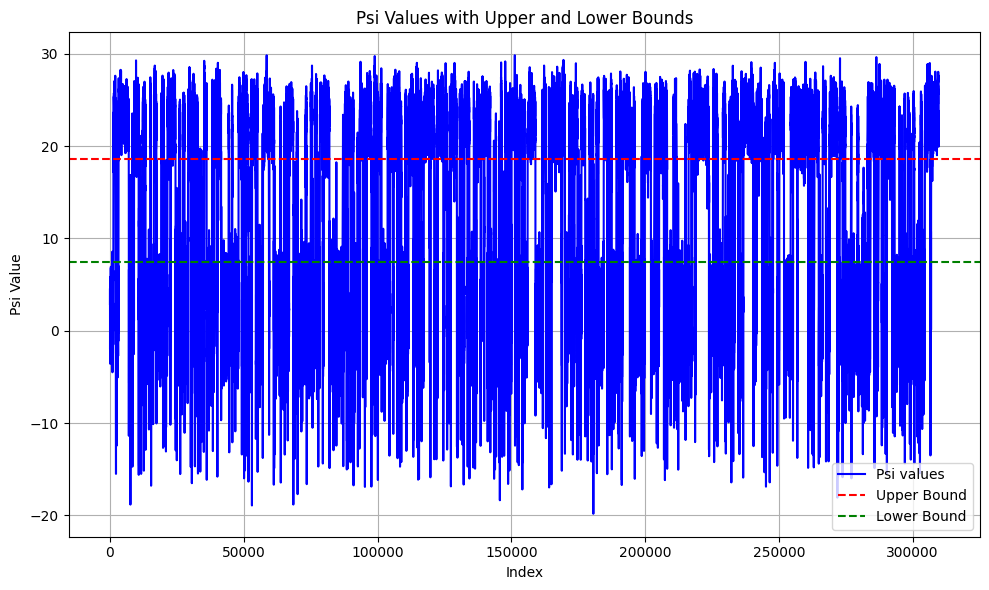

Percentile for upper y-value: 51.27930255085567
Percentile for lower y-value: 45.54924120116242
Variable 0 - Upper y-value at percentile: 4.6044849201761755
Variable 0 - Lower y-value at percentile: 4.533300491768997
Variable 1 - Upper y-value at percentile: 5.65414565954035
Variable 1 - Lower y-value at percentile: 5.501135638286531
Variable 2 - Upper y-value at percentile: 6.5887108173218945
Variable 2 - Lower y-value at percentile: 6.335635140011619
Variable 3 - Upper y-value at percentile: 7.4002587120560905
Variable 3 - Lower y-value at percentile: 7.006733939199377
Variable 4 - Upper y-value at percentile: 8.108966214406331
Variable 4 - Lower y-value at percentile: 7.500304829095635
Variable 5 - Upper y-value at percentile: 8.796582774450389
Variable 5 - Lower y-value at percentile: 7.7771585498892915
Variable 6 - Upper y-value at percentile: 9.616131096781467
Variable 6 - Lower y-value at percentile: 7.8220702425054975
Variable 7 - Upper y-value at percentile: 10.679028296299093

In [1]:
import numpy as np
import matplotlib.pyplot as plt

psi = np.load("/home/danielboscu/Documents/code/AI_RES/data/actual/long_run_310k.npy")
psi = psi[:,1,:]
print(psi.shape)

UPPER_BOUND = 53.8 / 2.8935
LOWER_BOUND = 7.41

psi = psi.reshape(309700, 75)
plt.figure(figsize=(10, 6))
plt.plot(psi[:, 63], label='Psi values', color='blue')
plt.axhline(y=UPPER_BOUND, color='red', linestyle='--', label='Upper Bound')
plt.axhline(y=LOWER_BOUND, color='green', linestyle='--', label='Lower Bound')
plt.title('Psi Values with Upper and Lower Bounds')
plt.xlabel('Index')
plt.ylabel('Psi Value')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
psi = psi[:, 50:75]
psi = psi.reshape(25, 309700)

def percentile_computation(series_data_1d, value):
    """
    Calculates the percentile rank of a given value within a 1D data array (a single variable's timepoints).
    The rank is the percentage of y-axis values in series_data_1d that are
    less than or equal to the given y-axis 'value'.
    """
    rank = np.sum(series_data_1d <= value)
    percentile = (rank / series_data_1d.size) * 100.0
    return percentile

def y_bounds_computation(data, row_63, upper_bound_of_63, lower_bound_of_63):
    """
    Calculates a scalar upper and lower y-axis bound for each variable (row) in data.

    Args:
        data (np.ndarray): (num_variables, num_time_points), e.g., (75, 309700).
        row_63 (int): Index of the variable used as reference.
        upper_bound_of_63 (float): The y-axis value considered as an upper
                                                   threshold for the reference variable.
        lower_bound_of_63 (float): The y-axis value considered as a lower
                                                   threshold for the reference variable.

    Returns:
        tuple: (upper_y_bounds, lower_y_bounds)
            - upper_y_bounds (np.ndarray): 1D array, shape (num_variables,).
              Each element is the scalar upper y-axis bound for the corresponding variable.
            - lower_y_bounds (np.ndarray): 1D array, shape (num_variables,).
              Each element is the scalar lower y-axis bound for the corresponding variable.
    """
    if not isinstance(data, np.ndarray) or data.ndim != 2:
        raise ValueError("data must be a 2D NumPy array.")
    
    num_variables, num_time_points = data.shape

    if not (0 <= row_63 < num_variables):
        raise ValueError("row_63 is out of bounds.")
    if num_variables == 0 or num_time_points == 0:
        raise ValueError("data must not be empty.")

    # --- Step 1: Determine Percentile Ranks from the Reference Variable's Y-Axis Values ---
    data = data.reshape(num_time_points, num_variables)
    ref_data = data[:, row_63] 

    # Find what percentile the given y-values represent for the reference variable
    percentile_for_upper_y_value = percentile_computation(
        ref_data, upper_bound_of_63
    )
    percentile_for_lower_y_value = percentile_computation(
        ref_data, lower_bound_of_63
    )
    print(f"Percentile for upper y-value: {percentile_for_upper_y_value}")
    print(f"Percentile for lower y-value: {percentile_for_lower_y_value}")

    # Initialize 1D arrays of shape (75,) to store the scalar y-axis bound for each variable
    upper_y_bounds = np.zeros(num_variables, dtype=float)
    lower_y_bounds = np.zeros(num_variables, dtype=float)

    data = data.reshape(num_time_points, num_variables)
    # --- Step 2: Calculate Y-Axis Bounds for Each Variable using these Percentiles ---
    for i in range(num_variables): # Loop 75 times
        
        current_variable_data = data[:, i] # Y-axis values for variable i
        # Find the y-axis value in current_variable_data that corresponds to the derived percentiles
        y_value_at_upper_percentile = np.percentile(current_variable_data, percentile_for_upper_y_value)
        y_value_at_lower_percentile = np.percentile(current_variable_data, percentile_for_lower_y_value)
        print(f"Variable {i} - Upper y-value at percentile: {y_value_at_upper_percentile}")
        print(f"Variable {i} - Lower y-value at percentile: {y_value_at_lower_percentile}")
        # Ensure the lower y-axis bound is numerically less than or equal to the upper y-axis bound
        lower_y_bounds[i] = y_value_at_lower_percentile
        upper_y_bounds[i] = y_value_at_upper_percentile

    return upper_y_bounds, lower_y_bounds

upper_bounds, lower_bounds = y_bounds_computation(psi, 13, UPPER_BOUND, LOWER_BOUND)
print("Upper bounds:", upper_bounds)
print("Lower bounds:", lower_bounds)


In [2]:
import numpy as np

psi = np.load("/home/danielboscu/Documents/code/AI_RES/data/actual/long_run_310k.npy")
psi = psi[:,1,:]

In [3]:
removal_factor = 0.3
upper_bound     = 53.8 / 2.8935
lower_bound     = 7.41

Number of time steps: 309700


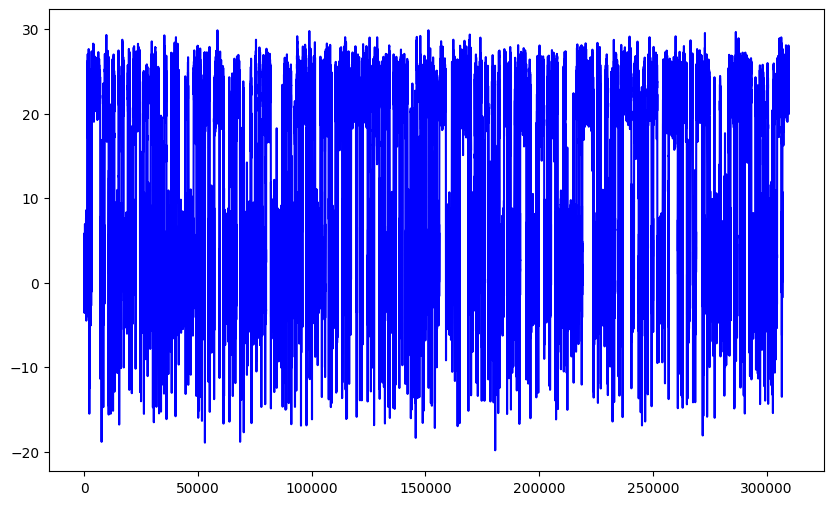

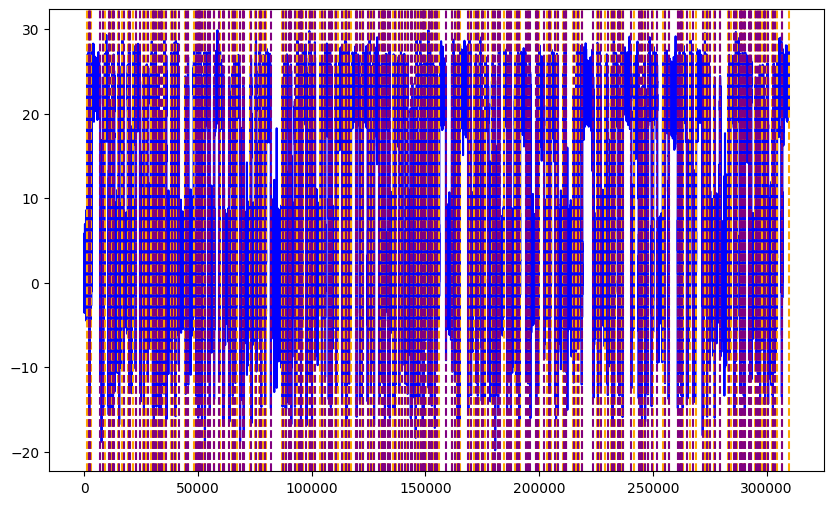

200 A states
198 B states
397 Transition states


In [4]:
num_time_steps = psi.shape[0]
print("Number of time steps:", num_time_steps)
cpsi = psi[:num_time_steps, 50:75]

plt.figure(figsize=(10, 6))
plt.plot(cpsi[:num_time_steps, 13], label='Variable 21', color='blue')
plt.show()

st_start = 0 # start of the state
st_stop  = 0 # end of the state
tr_start = 0 # transition start
tr_stop  = 0 # transition stop

# for v in range (0, 25):

v = 13

bl       = None # below lower bound
au       = None # above upper bound
ints     = False # inside the bounds

A_states = [] # list of A states
B_states = [] # list of B states
T_states = [] # list of transition states

if cpsi[0, v] < lower_bounds[v]:
    bl = True
    au = False
elif cpsi[0, v] > upper_bounds[v]:
    au = True
    bl = False

for i in range(0, num_time_steps):
    if cpsi[i, v] < lower_bounds[v] and ints is True and au is True:

        B_states.append((st_start, st_stop))

        tr_stop  = i
        st_start = i
        bl       = True
        au       = False

        T_states.append((tr_start, tr_stop))
        ints     = False

    if cpsi[i, v] < lower_bounds[v] and ints is True and bl is True:

        ints     = False

    if cpsi[i, v] > upper_bounds[v] and ints is True and bl is True:

        A_states.append((st_start, st_stop))

        tr_stop  = i
        st_start = i
        au       = True
        bl       = False
        
        T_states.append((tr_start, tr_stop))
        ints     = False
    
    if cpsi[i, v] > upper_bounds[v] and ints is True and au is True:

        ints     = False

    if ((cpsi[i, v] < upper_bounds[v] and au is True and ints is False) or 
        (cpsi[i, v] > lower_bounds[v] and bl is True and ints is False)):

        st_stop  = i
        tr_start = i
        ints     = True

        # if au is True:
        #     A_states.append((st_start, st_stop))
        #     # au = False

        # if bl is True:
        #     B_states.append((st_start, st_stop))
        #     # bl = False

if au is True:
    A_states.append((st_start, num_time_steps))
if bl is True:
    B_states.append((st_start, num_time_steps))
    

plt.figure(figsize=(10, 6))
plt.plot(cpsi[:num_time_steps, 13], label='Variable 21', color='blue')
for state in A_states:
    start, stop = state
    plt.axvline(x=stop, color='orange', linestyle='--', label='A State End' if state == A_states[0] else "")
for state in B_states:
    start, stop = state
    plt.axvline(x=stop, color='purple', linestyle='--', label='B State End' if state == B_states[0] else "")    
plt.show()

print(len(A_states), "A states")
print(len(B_states), "B states")
print(len(T_states), "Transition states")

In [5]:
A_length = 0
for state in A_states:
    start, stop = state
    length = stop - start
    A_length += length
print("A state length:", A_length)
B_length = 0
for state in B_states:
    start, stop = state
    length = stop - start
    B_length += length
print("B state length:", B_length)
T_length= 0
for state in T_states:
    start, stop = state
    length = stop - start
    T_length += length
print("Transition state length:", T_length)

A state length: 149684
B state length: 151380
Transition state length: 8636


In [6]:
pred = np.load("/home/danielboscu/Documents/code/AI_RES/training/predictions_best_checkpoint_and_cycle_Resnet_VAE_best_epoch_no_finetune.npy")
pred = pred[:300000, :]
print(pred.shape)

psi = np.load("/home/danielboscu/Documents/code/AI_RES/data/actual/long_run_310k.npy")
psi = psi[:300000, 1, :]
print(psi.shape)

(300000, 75)
(300000, 75)


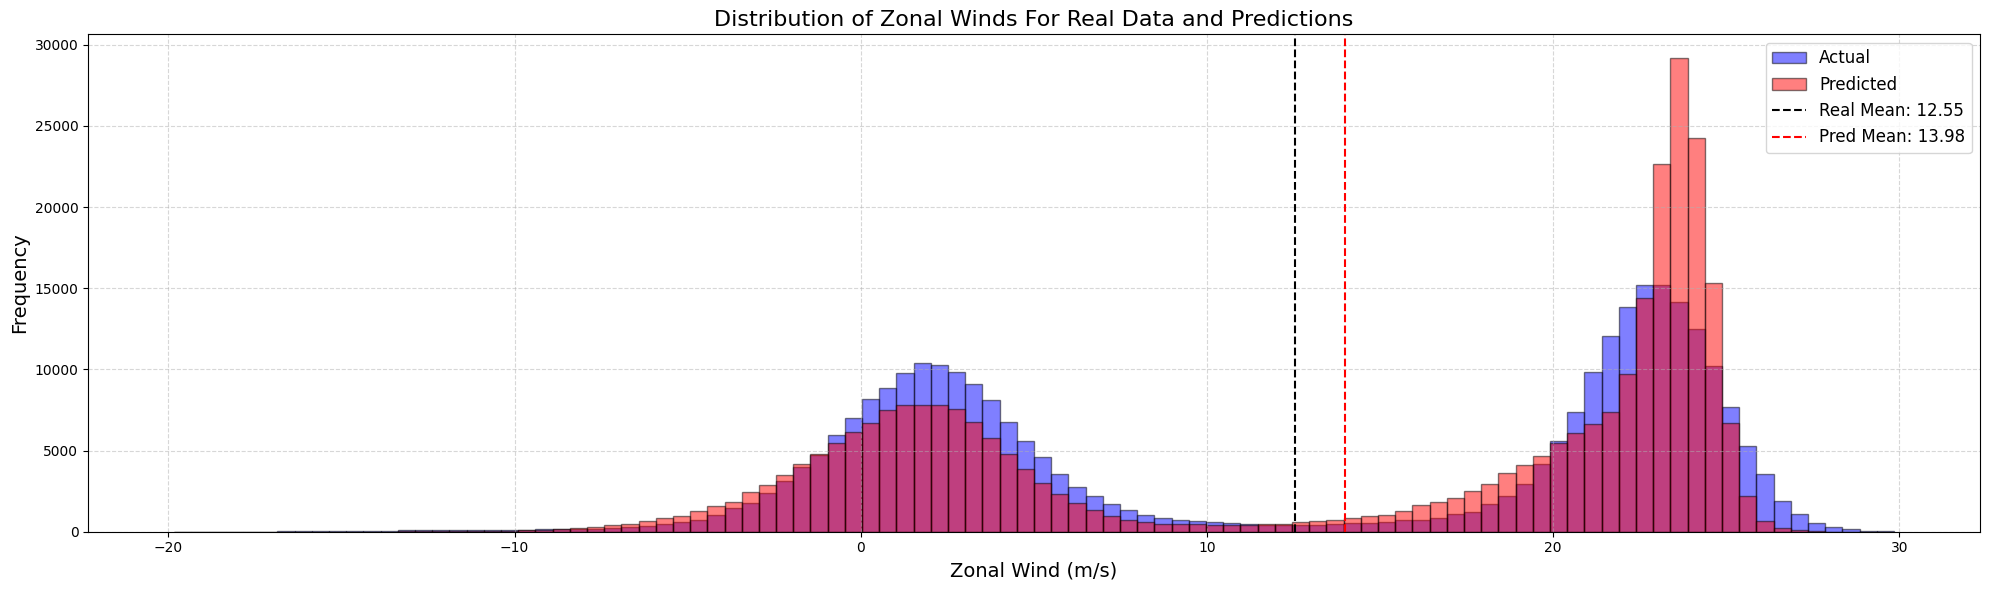

(100,)
[    0     1     1     2     2     3     4     3     3    10     3    12
    10    19    25    27    32    47    45    59    77   123   162   213
   290   410   490   668   823   977  1292  1562  1840  2431  2872  3488
  4168  4805  5453  6160  6670  7526  7817  7786  7785  7533  6781  5755
  4774  3863  3022  2350  1772  1318   989   752   601   505   461   459
   393   393   423   472   496   589   643   715   834   965  1054  1282
  1628  1832  2091  2501  2941  3628  4093  4690  5488  6084  6633  7402
  9729 14376 22684 29187 24287 15349  6671  2225   659   249   119    47
     8     2     1     1]
299995


In [7]:
level = 63
actual_hist, bins = np.histogram(psi[:, level], bins=100)
pred_hist, pred_bins = np.histogram(pred[:, level], bins=bins)

plt.figure(figsize=(20,6))
plt.hist(psi[:, level], bins=bins, alpha=0.5, label='Actual', color='blue', edgecolor='black')
plt.hist(pred[:, level], bins=bins, alpha=0.5, label='Predicted', color='red', edgecolor='black')

# Customize plot labels and title
plt.title('Distribution of Zonal Winds For Real Data and Predictions', fontsize=16)
plt.xlabel('Zonal Wind (m/s)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add vertical lines at means
plt.axvline(np.mean(psi[:, level]), color='black', linestyle='--', label=f'Real Mean: {np.mean(psi[:, level]):.2f}')
plt.axvline(np.mean(pred[:, level]), color='red', linestyle='--', label=f'Pred Mean: {np.mean(pred[:, level]):.2f}')

# Final plot settings
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(pred_hist.shape)
print(pred_hist)
print(np.sum(pred_hist))

In [8]:
above_mean = pred_bins > np.mean(pred[:, level])
removal_condition = pred_hist > actual_hist
# Find where predicted counts are greater than actual counts
removal_condition = pred_hist > actual_hist

# Create a mask for bins where pred_hist has values
has_predictions = pred_hist > 0

# Select only the bins above the mean of the level
above_mean_level = pred_bins[1:] > np.mean(pred[:, level])

# Combine all conditions - bins must have predictions AND be above the mean level
condition = has_predictions & above_mean_level

# Calculate how many values to remove from each bin
amounts_to_remove = np.where(removal_condition & condition, 
							pred_hist - actual_hist, 
							0)
print("Amounts to remove:", amounts_to_remove)
new_cond = amounts_to_remove > 0
amounts_to_remove = amounts_to_remove[new_cond]
print("Filtered amounts to remove:", amounts_to_remove)
new_pred_bins = pred_bins[1:][new_cond]
print("New predicted bins:", new_pred_bins)

pred_hist = pred_hist[:][new_cond]
actual_hist = actual_hist[:][new_cond]
print("Filtered predicted histogram:", pred_hist)
print("Filtered actual histogram:", actual_hist)

Amounts to remove: [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   305   443   473   577
   876   969   975  1262  1237  1452  1128   543     0     0     0     0
     0     0  7465 15059 11782  5126     0     0     0     0     0     0
     0     0     0     0]
Filtered amounts to remove: [  305   443   473   577   876   969   975  1262  1237  1452  1128   543
  7465 15059 11782  5126]
New predicted bins: [14.44358142 14.94037801 15.43717461 15.9339712  16.43076779 16.92756438
 17.42436098 17.92115757 18.41795416 18.91475076 19.41154735 19.90834394
 23.38592009 23.88271669 24.37951328 24.87630987]
Filtered predicted histogram

In [9]:
print(amounts_to_remove)

[  305   443   473   577   876   969   975  1262  1237  1452  1128   543
  7465 15059 11782  5126]


In [10]:
removal_hist =  pred_hist - actual_hist
print(removal_hist)

[  305   443   473   577   876   969   975  1262  1237  1452  1128   543
  7465 15059 11782  5126]


In [11]:
print(np.sum(removal_hist[:]))
print(pred_hist[0] - actual_hist[0])

49672
305


In [12]:
bound_value = new_pred_bins[0]
print(bound_value)

14.443581420006506


Lower bound: 14.443581420006506
Upper bound: 14.940378012925311
Bin indices: [  2334   4073   4232   4234   4236   4237   6640   6641   6670   6675
   6707   6710   7283   7284   7319   7627   7715   7721   7878   7885
   8140   8159   8180   8181   9704  10050  10164  10167  11011  11012
  11013  11015  11054  11065  11112  11117  11118  11124  11125  11130
  11621  12383  13512  13516  13540  13541  13686  17046  19210  19228
  19229  19230  19239  19240  19246  19289  19316  20011  20015  20029
  20030  20031  20345  21466  21588  21601  21602  22576  22577  22598
  22599  22762  24503  24504  24505  24524  24525  25720  25727  25760
  25765  25766  26086  26090  26091  27128  27519  27528  27785  27786
  27787  27997  28003  28004  28025  28048  28060  28067  28733  28782
  28784  28954  28956  32370  34295  34297  36895  38548  38549  38556
  38557  38564  38565  38566  38569  38574  39491  40315  40343  40349
  40568  42253  42392  42394  42403  42415  42420  42764  43348  43356


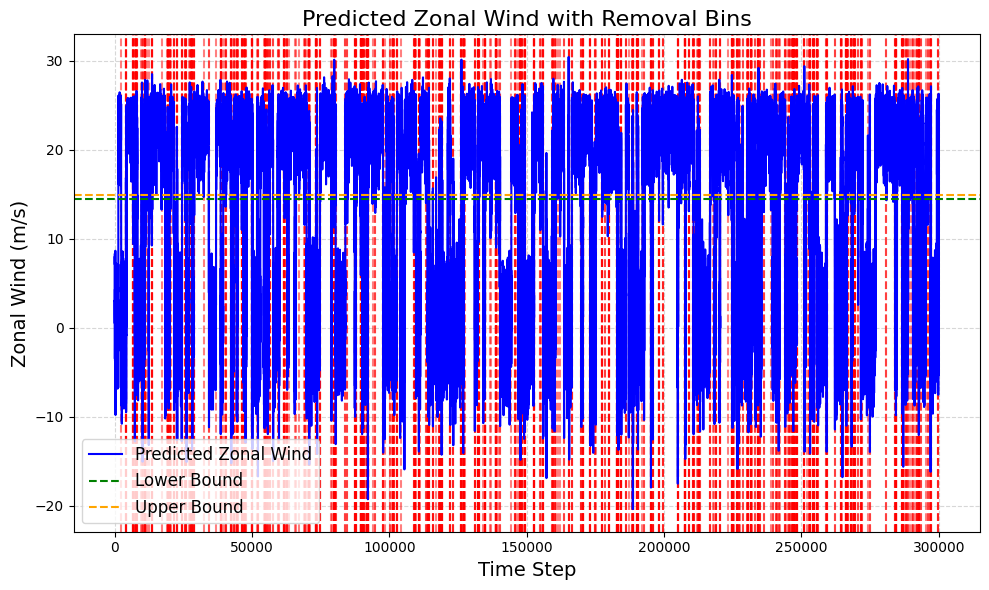

In [13]:
lb = new_pred_bins[0]
ub = new_pred_bins[1]
print("Lower bound:", lb)
print("Upper bound:", ub)

condition = (pred[:, level] >= lb) & (pred[:, level] < ub)
bin_indices = np.where(condition)[0]
print("Bin indices:", bin_indices)
print(f"Bin {i}: {lb:.3f} - {ub:.3f}, Bin Indices: {len(bin_indices)}, Amount to remove: {amounts_to_remove[0]}")

plt.figure(figsize=(10, 6))
print(len(bin_indices))
for index in bin_indices:
    plt.axvline(x=index, color='red', linestyle='--', alpha=0.5)
plt.plot(pred[:, level], label='Predicted Zonal Wind', color='blue')
plt.axhline(y=lb, color='green', linestyle='--', label='Lower Bound')
plt.axhline(y=ub, color='orange', linestyle='--', label='Upper Bound')
plt.title('Predicted Zonal Wind with Removal Bins', fontsize=16)
plt.xlabel('Time Step', fontsize=14)
plt.ylabel('Zonal Wind (m/s)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [14]:
indices_removal = []
for i in range(len(new_pred_bins)-1):
    lb = new_pred_bins[i]
    ub = new_pred_bins[i+1]

    condition = (psi[:, level] >= lb) & (psi[:, level] < ub)
    bin_indices = np.where(condition)[0]
    print(f"Bin {i}: {lb:.3f} - {ub:.3f}, Bin Indices: {len(bin_indices)}, Amount to remove: {amounts_to_remove[i]}")

    to_remove = min(int(amounts_to_remove[i]), len(bin_indices))
    if lb > 20:
        bin_indices = np.random.choice(bin_indices, size=int(to_remove*0), replace=False)
        indices_removal.extend(bin_indices)
        print(f"Bin {i}: {len(bin_indices)} data points between {lb:.3f} and {ub:.3f} to remove")
    else:
        bin_indices = np.random.choice(bin_indices, size=int(to_remove), replace=False)
        indices_removal.extend(bin_indices)
        print(f"Bin {i}: {len(bin_indices)} data points between {lb:.3f} and {ub:.3f} to remove")

print("Indices to remove:", indices_removal)
print(any(x < 10 for x in indices_removal))
print("Number of indices to remove:", len(indices_removal))
psi_removal = psi[indices_removal, level]
print(psi_removal.shape)
for index in indices_removal:
    if index < 12:
        print(True)


Bin 0: 14.444 - 14.940, Bin Indices: 522, Amount to remove: 305
Bin 0: 305 data points between 14.444 and 14.940 to remove
Bin 1: 14.940 - 15.437, Bin Indices: 581, Amount to remove: 443
Bin 1: 443 data points between 14.940 and 15.437 to remove
Bin 2: 15.437 - 15.934, Bin Indices: 705, Amount to remove: 473
Bin 2: 473 data points between 15.437 and 15.934 to remove
Bin 3: 15.934 - 16.431, Bin Indices: 752, Amount to remove: 577
Bin 3: 577 data points between 15.934 and 16.431 to remove
Bin 4: 16.431 - 16.928, Bin Indices: 863, Amount to remove: 876
Bin 4: 863 data points between 16.431 and 16.928 to remove
Bin 5: 16.928 - 17.424, Bin Indices: 1116, Amount to remove: 969
Bin 5: 969 data points between 16.928 and 17.424 to remove
Bin 6: 17.424 - 17.921, Bin Indices: 1239, Amount to remove: 975
Bin 6: 975 data points between 17.424 and 17.921 to remove
Bin 7: 17.921 - 18.418, Bin Indices: 1704, Amount to remove: 1262
Bin 7: 1262 data points between 17.921 and 18.418 to remove
Bin 8: 18.4

In [15]:
psi = np.load("/home/danielboscu/Documents/code/AI_RES/data/actual/long_run_310k.npy")
psi = psi[:,1,:]
print(psi.shape)
psi = np.delete(psi, indices_removal, axis=0, )

(309700, 75)


In [16]:
print(psi.shape)

(299473, 75)


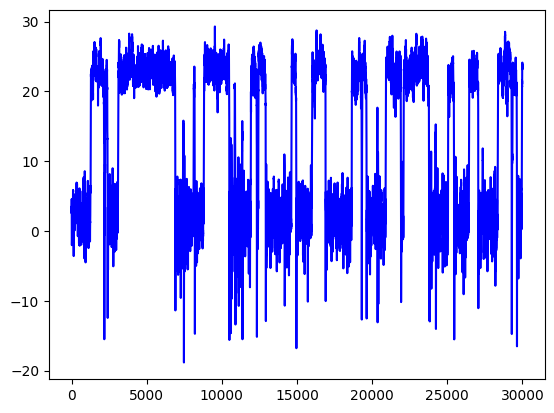

In [17]:
num_time_steps = 30000
plt.Figure(figsize=(10, 6))
plt.plot(psi[:num_time_steps, 63], label='Variable 21', color='blue')
plt.show()

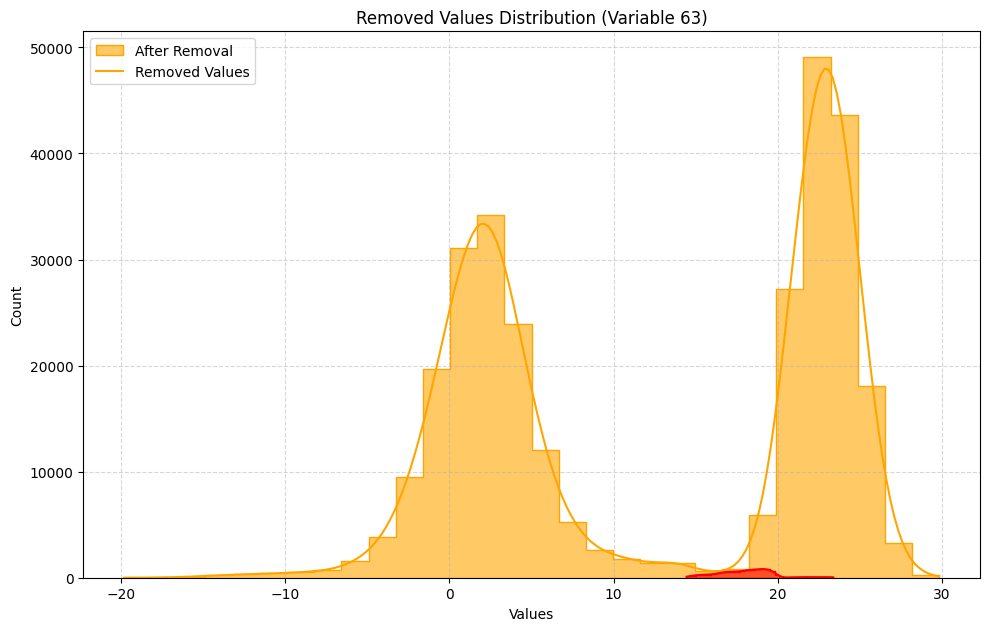

In [18]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(psi[:, 63], bins=30, kde=True, alpha=0.6, element='step',color='orange')
sns.histplot(psi_removal, bins=30, kde=True, alpha=0.6, element='step', color='red')
plt.legend(['After Removal', 'Removed Values'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.title('Removed Values Distribution (Variable 63)')
plt.xlabel('Values')
plt.show()

Number of time steps: 299473


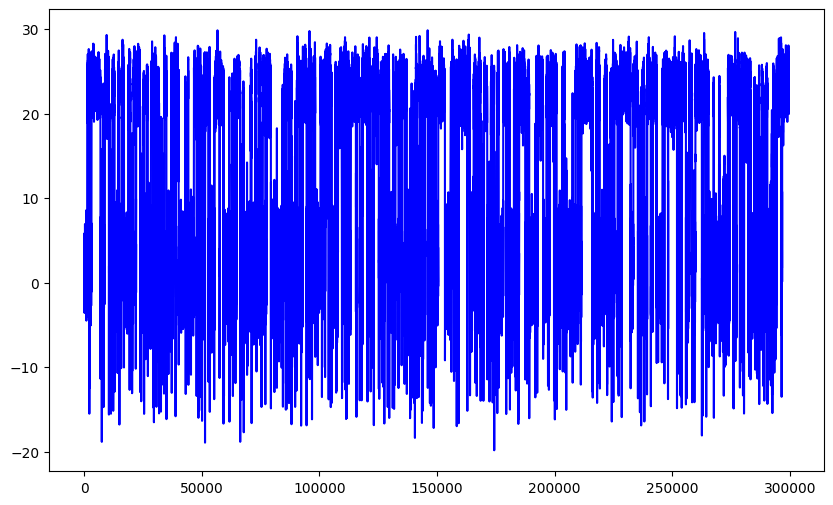

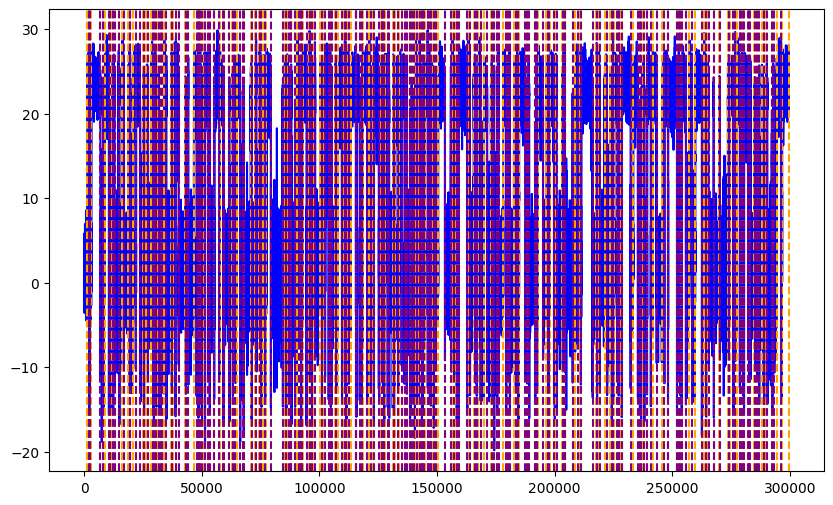

200 A states
198 B states
198 Transition states (A to B)
199 Transition states (B to A)


In [19]:
num_time_steps = psi.shape[0]
print("Number of time steps:", num_time_steps)
cpsi = psi[:num_time_steps, 50:75]

plt.figure(figsize=(10, 6))
plt.plot(cpsi[:num_time_steps, 13], label='Variable 13', color='blue')
plt.show()

st_start = 0 # start of the state
st_stop  = 0 # end of the state
tr_start = 0 # transition start
tr_stop  = 0 # transition stop

# for v in range (0, 25):

v = 13

bl       = None # below lower bound
au       = None # above upper bound
ints     = False # inside the bounds

A_states = [] # list of A states
B_states = [] # list of B states
T_states_to_B = [] # list of A to B transition states
T_states_to_A = [] # list of B to A transition states

if cpsi[0, v] < lower_bounds[v]:
    bl = True
    au = False
elif cpsi[0, v] > upper_bounds[v]:
    au = True
    bl = False

for i in range(0, num_time_steps):
    if cpsi[i, v] < lower_bounds[v] and ints is True and au is True:

        B_states.append((st_start, st_stop))

        tr_stop  = i
        st_start = i
        bl       = True
        au       = False

        T_states_to_B.append((tr_start, tr_stop))
        ints     = False

    if cpsi[i, v] < lower_bounds[v] and ints is True and bl is True:

        ints     = False

    if cpsi[i, v] > upper_bounds[v] and ints is True and bl is True:

        A_states.append((st_start, st_stop))

        tr_stop  = i
        st_start = i
        au       = True
        bl       = False
        
        T_states_to_A.append((tr_start, tr_stop))
        ints     = False
    
    if cpsi[i, v] > upper_bounds[v] and ints is True and au is True:

        ints     = False

    if ((cpsi[i, v] < upper_bounds[v] and au is True and ints is False) or 
        (cpsi[i, v] > lower_bounds[v] and bl is True and ints is False)):

        st_stop  = i
        tr_start = i
        ints     = True

        # if au is True:
        #     A_states.append((st_start, st_stop))
        #     # au = False

        # if bl is True:
        #     B_states.append((st_start, st_stop))
        #     # bl = False

if au is True:
    A_states.append((st_start, num_time_steps))
if bl is True:
    B_states.append((st_start, num_time_steps))

plt.figure(figsize=(10, 6))
plt.plot(cpsi[:num_time_steps, 13], label='Variable 21', color='blue')
for state in A_states:
    start, stop = state
    plt.axvline(x=stop, color='orange', linestyle='--', label='A State End' if state == A_states[0] else "")
for state in B_states:
    start, stop = state
    plt.axvline(x=stop, color='purple', linestyle='--', label='B State End' if state == B_states[0] else "")    
plt.show()

print(len(A_states), "A states")
print(len(B_states), "B states")
print(len(T_states_to_B), "Transition states (A to B)")
print(len(T_states_to_A), "Transition states (B to A)")

In [20]:
import math

removal_factor = 0.025
selected_A_to_B_transitions = np.random.choice(len(T_states_to_B), math.floor(len(T_states_to_B)*(removal_factor)), replace=False)
print(len(T_states_to_B))
print(len(selected_A_to_B_transitions))

selected_B_to_A_transitions = np.random.choice(len(T_states_to_A), math.floor(len(T_states_to_A)*(removal_factor)), replace=False)
print(len(T_states_to_A))
print(len(selected_B_to_A_transitions))

Ts = []
for T in selected_A_to_B_transitions:
    start, stop = T_states_to_B[T]
    Ts.extend((start, stop))

for T in selected_B_to_A_transitions:
    start, stop = T_states_to_A[T]
    Ts.extend((start, stop))
    
Ts.sort()
Ts = [(Ts[i], Ts[i+1]) for i in range(0, len(Ts), 2)]
print("Selected transitions:", Ts)
print(psi.shape, type(Ts))

new_psi = []  # New psi array after removing selected transitions
attached = False
start = 0
stop = 0
for i in range(psi.shape[0]):
    if not any(start <= i <= stop for start, stop in Ts):
        if start is None:
            start = i
        stop = i
        attached = False
    else:
        if not attached:
            new_psi.extend([psi[start:stop, :]])
            start = None
            attached = True

new_psi.extend([psi[start:stop, :]])

print(len(new_psi))
print(np.sum([arr.shape[0] for arr in new_psi]))

198
4
199
4
Selected transitions: [(27053, 27061), (59192, 59202), (75282, 75338), (126601, 126611), (131668, 131672), (210149, 210159), (253255, 253274), (284909, 284920)]
(299473, 75) <class 'list'>
9
299328


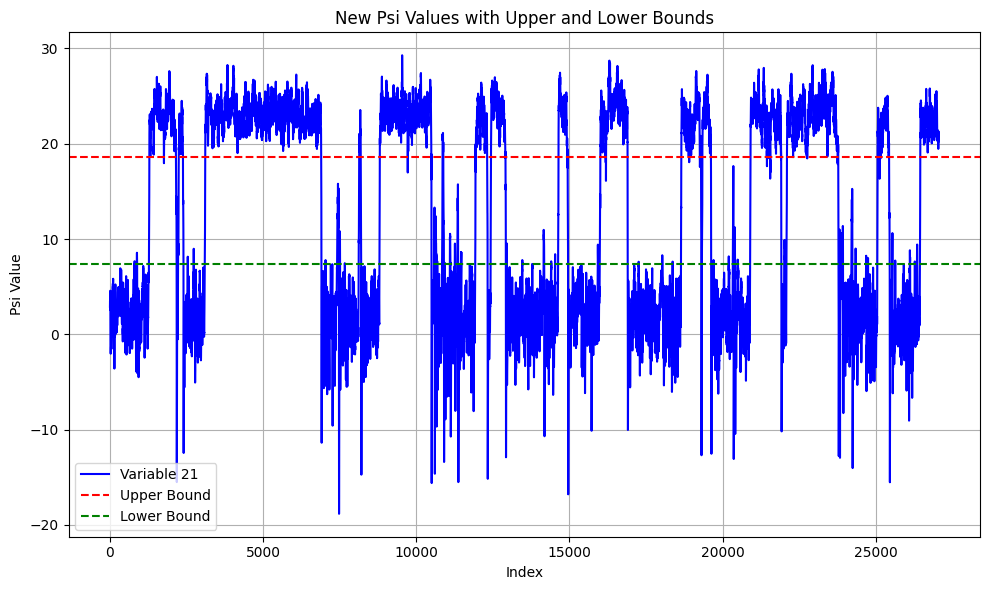

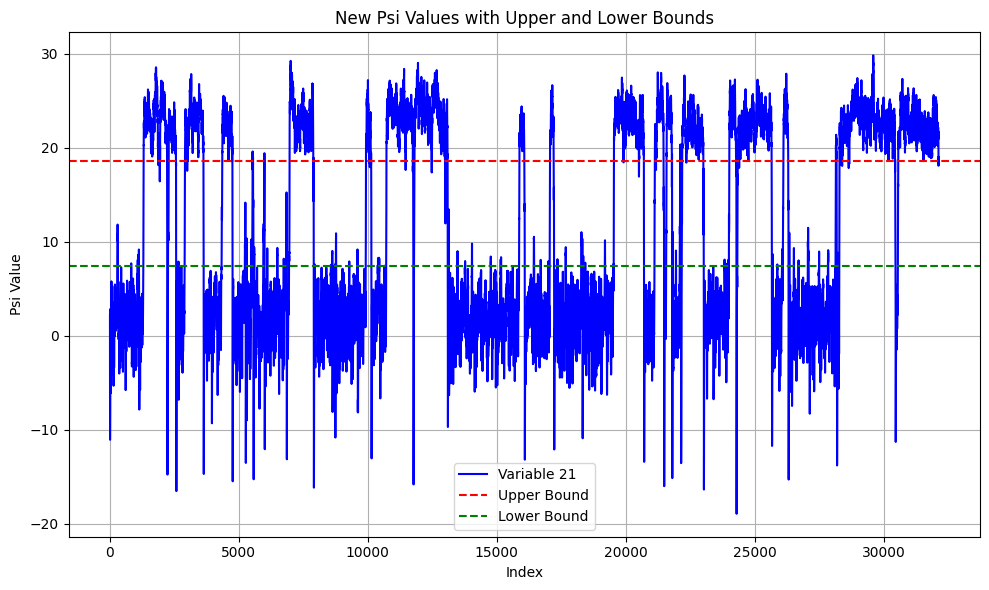

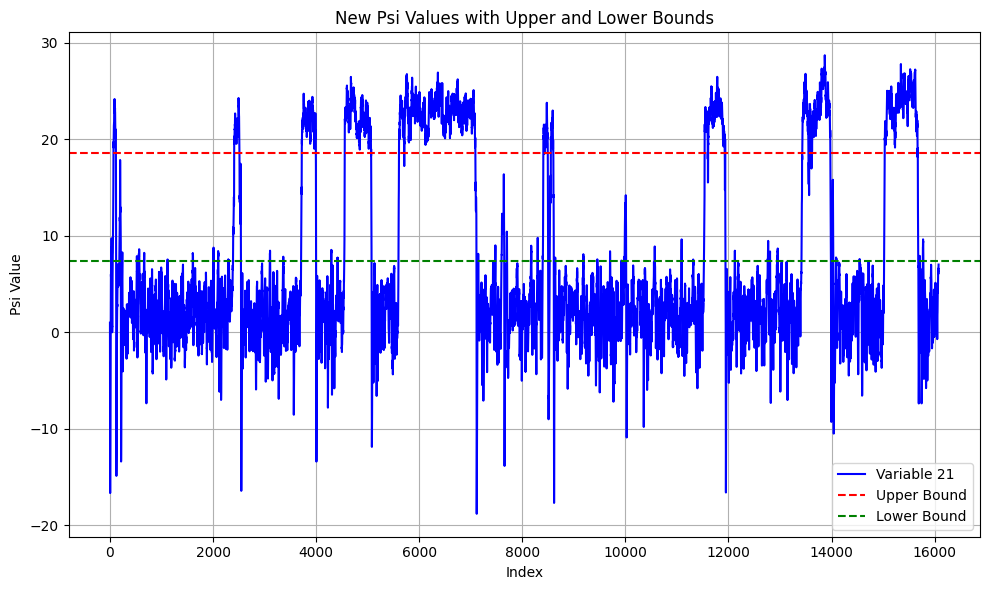

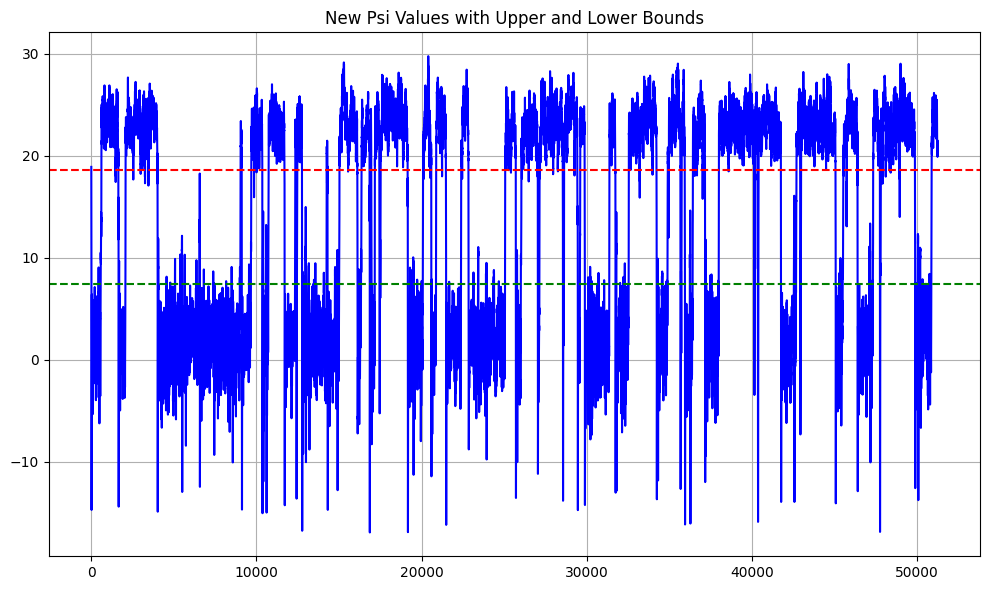

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(new_psi[0][:, 63], label='Variable 21', color='blue')
plt.axhline(y=upper_bounds[13], color='red', linestyle='--', label='Upper Bound')
plt.axhline(y=lower_bounds[13], color='green', linestyle='--', label='Lower Bound')
plt.title('New Psi Values with Upper and Lower Bounds')
plt.xlabel('Index')
plt.ylabel('Psi Value')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(new_psi[1][:, 63], label='Variable 21', color='blue')
plt.axhline(y=upper_bounds[13], color='red', linestyle='--', label='Upper Bound')
plt.axhline(y=lower_bounds[13], color='green', linestyle='--', label='Lower Bound')
plt.title('New Psi Values with Upper and Lower Bounds')
plt.xlabel('Index')
plt.ylabel('Psi Value')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(new_psi[2][:, 63], label='Variable 21', color='blue')
plt.axhline(y=upper_bounds[13], color='red', linestyle='--', label='Upper Bound')
plt.axhline(y=lower_bounds[13], color='green', linestyle='--', label='Lower Bound')
plt.title('New Psi Values with Upper and Lower Bounds')
plt.xlabel('Index')
plt.ylabel('Psi Value')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(new_psi[3][:, 63], label='Variable 21', color='blue')
plt.axhline(y=upper_bounds[13], color='red', linestyle='--', label='Upper Bound')
plt.axhline(y=lower_bounds[13], color='green', linestyle='--', label='Lower Bound')
plt.title('New Psi Values with Upper and Lower Bounds')
plt.grid()
plt.tight_layout()
plt.show()

# TRAINING/FINETUNING

## Pre-processing data

50
27052
32129
16078
51261
5055
78475
43094
31633
14551


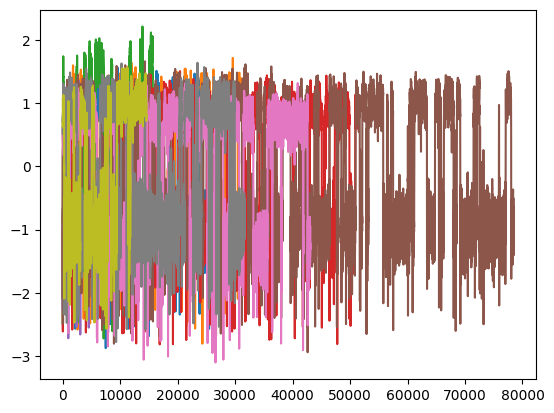

33258.666666666664


In [22]:
import numpy as np
import numpy as np
from scipy.integrate import solve_ivp
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import sys
import torch
import matplotlib.pyplot as plt
from torch.amp import GradScaler, autocast
import wandb
import gc
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

psi = np.load("/home/danielboscu/Documents/code/AI_RES/data/actual/long_run_310k.npy")

psi = psi[:,1,:]

# Normalization
mean_psi = np.mean(psi, axis=0, keepdims=True)
std_psi = np.std(psi, axis=0, keepdims=True)
psi = (psi - mean_psi) / std_psi

# # Pre-processing

# lead = 1
# trainN = 250000
# valN = 50000
# index = 63

# Defining the variable ranges
variable_range = [(0,24), (25, 49), (50, 74), (0, 49), (0,74)]

# Select the variable: 0 for real perturbation, 1 for imaginary perturbation, 2 for zonal winds
variable = 3
num_variables = variable_range[variable][1] - variable_range[variable][0] + 1
print(num_variables)

# # Shuffle and map indices
# np.random.seed(42)
# valid_indices = np.arange(0, trainN - lead)
# shuffled_indices = np.random.permutation(valid_indices)

# # Now constrain the shuffled indices to the variable range
# np_psi_train_input = psi[shuffled_indices, variable_range[variable][0]:variable_range[variable][1]+1]
# np_psi_train_label = psi[shuffled_indices + lead, :]

# psi_train_input = torch.tensor(np_psi_train_input)
# psi_train_label = torch.tensor(np_psi_train_label)

# np_psi_val_input = psi[trainN:trainN+valN, variable_range[variable][0]:variable_range[variable][1]+1]
# np_psi_val_label = psi[trainN+lead:trainN+valN+lead, :]
# psi_val_input = torch.tensor(np_psi_val_input)
# psi_val_label =  torch.tensor(np_psi_val_label)

# print(psi.shape)
# print(psi_train_input.shape)
# print(psi_train_label.shape)
# print(psi_val_input.shape)
# print(psi_val_label.shape)

series = new_psi
normalized_series = []
len_series = []
for s in series:
    print(len(s))
    mean_s = np.mean(s, axis=0, keepdims=True)
    std_s = np.std(s, axis=0, keepdims=True)
    s = (s - mean_s) / std_s
    s = torch.tensor(s)
    len_series.append(len(s))
    normalized_series.append(s)
    plt.plot(s[:,63])

plt.show()
print(sum(len_series)/len(len_series))

## Architecture

In [23]:
class Encoder(nn.Module):
    def __init__(self, latent_dim, num_neurons):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(75, num_neurons)  # Input layer (2 + 2) -> Hidden layer (128)
        self.fc2 = nn.Linear(num_neurons, num_neurons)  # Hidden layer (128) -> Hidden layer (128)
        self.fc3 = nn.Linear(num_neurons, num_neurons)  # Hidden layer (128) -> Hidden layer (128)
        self.fc4 = nn.Linear(num_neurons, num_neurons)  # Hidden layer (128) -> Hidden layer (128)
        self.fc5 = nn.Linear(num_neurons, num_neurons)  # Hidden layer (128) -> Hidden layer (128)
        self.fc6 = nn.Linear(num_neurons, num_neurons)  # Hidden layer (128) -> Hidden layer (128)
        self.fc_mu = nn.Linear(num_neurons, latent_dim)  # Hidden layer (128) -> Latent space (2)
        self.fc_logvar = nn.Linear(num_neurons, latent_dim)  # Hidden layer (128) -> Log variance (2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Activation function for hidden layer
        x = torch.relu(self.fc2(x)) + x
        x = torch.relu(self.fc3(x)) + x
        x = torch.relu(self.fc4(x)) + x
        x = torch.relu(self.fc5(x)) + x
        x = torch.relu(self.fc6(x)) + x
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

# Define the decoder (MLP)
class Decoder(nn.Module):
    def __init__(self, latent_dim, output_dim, condition_dim, num_neurons):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim + condition_dim, num_neurons)  # Input layer (2 + 2) -> Hidden layer (128)
        self.fc2 = nn.Linear(num_neurons, num_neurons)  # Hidden layer (128) -> Hidden layer (128)
        self.fc3 = nn.Linear(num_neurons, num_neurons)  # Hidden layer (128) -> Hidden layer (128)
        self.fc4 = nn.Linear(num_neurons, num_neurons)  # Hidden layer (128) -> Hidden layer (128)
        self.fc5 = nn.Linear(num_neurons, num_neurons)  # Hidden layer (128) -> Hidden layer (128)
        self.fc6 = nn.Linear(num_neurons, num_neurons)  # Hidden layer (128) -> Hidden layer (128)
        self.fc_output = nn.Linear(num_neurons, output_dim)  # Hidden layer (128) -> Output layer (2)

    def forward(self, z, condition):
        z = torch.cat((z, condition), dim=1)  # Concatenate latent vector and condition
        z = torch.relu(self.fc1(z))  # Activation function for hidden layer
        z = torch.relu(self.fc2(z)) + z
        z = torch.relu(self.fc3(z)) + z
        z = torch.relu(self.fc4(z)) + z
        z = torch.relu(self.fc5(z)) + z
        z = torch.relu(self.fc6(z)) + z
        output = self.fc_output(z)
        return output

# Define the VAE model
class ConditionalVAE(nn.Module):
    def __init__(self, latent_dim, output_dim, condition_dim, num_neurons):
        super(ConditionalVAE, self).__init__()
        self.encoder = Encoder(latent_dim, num_neurons)
        self.decoder = Decoder(latent_dim, output_dim, condition_dim, num_neurons)

    def encode(self, x):
        mu, logvar = self.encoder(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z, condition):
        return self.decoder(z, condition)

    def forward(self, x, condition):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        output = self.decode(z, condition)
        return output, mu, logvar
    
output_dim = 75
condition_dim = num_variables

scaler          = GradScaler()
upper_bound     = 53.8 / 2.8935
lower_bound     = 7.41
level           = 63

## Defining functions

In [24]:
# CHOOSING BY EXP FIT
# TO-DO: Check if crps is correct

from scipy.stats import linregress

def normalize_transition_time(s, neuro_num, r):
    """
    Normalize the transition time based on the specified num_neurons and reference value.

    Args:
        s (float): The transition time to normalize.
        neuro_num (float): The num_neurons value for normalization.
        r (float): The reference value for normalization.

    Returns:
        norm (float): The normalized transition time.
    """
    norm = 1 - np.exp(-np.abs((s - r)) / neuro_num)
    return norm

# Code from Ira Shokar but slightly changed
def crps_score(p, y):
    """
    Calculate CRPS for given predictions and observations.

    Args:
        p (Tensor): Predictions, shape (N, D) where N = ens_num and D is the dimension of the prediction.
        y (Tensor): Observations, shape (D) where D is the dimension of the observation.

    Returns:
        crps (float): The CRPS score.
    """
    y  = y.unsqueeze(0)
    # First term: mean distance from observations to ensemble members
    mae     = torch.cdist(y, p, 1).mean()
    # Second term: mean distance between ensemble members (properly normalized)
    ens_var = torch.cdist(p, p, 1).mean()
    
    return mae - 0.5 * ens_var

# Function to calculate transition durations
def calculate_transition_durations(y, u, l):
    """
    Calculate the return periods with user-defined upper and lower bounds.

    Args:
        y (np.array): The time series data.
        u (float): The upper bound for the transition.
        l (float): The lower bound for the transition.

    Returns:
        t_times (list): The list of return periods for transitions.
    """

    t_times = []
    s = None
    above_u = False
    below_l = False
    for i in range(1, len(y)):
        if y[i] < l:  
            below_l = True
            above_u = False
        elif y[i] > u:  
            if below_l and s is not None:
                t_times.append(i - s)
                s = None  
            above_u = True
            below_l = False

        if below_l and s is None:
            s = i
    return t_times

def KL_coefficient(r, p, num_neurons, cycle, KL_by_dim_cycle, L1_by_dym_cycle):
    """
    Calculate the KL divergence between two distributions and normalize it.

    Args:
        r (np.array): Real distribution.
        p (np.array): Predicted distribution.
        num_neurons (float): num_neurons value for normalization.
        cycle (int): Cycle number for tracking.
        KL_by_dim_cycle (dict): Dictionary to store KL divergence values by dimension and cycle.

    Returns:
        r (np.array): Processed real distribution.
        p (np.array): Processed predicted distribution.
        nkl (float): Normalized KL divergence.
    """
    # Calculating KL divergence
    r = r[:300000, 1, 63]
    p = p[:300000]
    
    rh, b = np.histogram(r, bins=100, density=True)
    ph, _ = np.histogram(p, bins=b, density=True)

    abs_diff = np.abs(rh-ph)
    max_diff = np.max(abs_diff)
    norm_diff = max_diff / (np.max(rh) + np.max(ph))

    e = 1e-10
    rh += e
    ph += e

    # Calculate KL divergence between the two histograms
    kl = np.sum(rh * np.log(rh / ph))
    nkl = normalize_transition_time(kl, 1, 0)

    KL_by_dim_cycle[num_neurons][cycle].append(nkl)
    L1_by_dym_cycle[num_neurons][cycle].append(norm_diff)
    
    return r, p, nkl, norm_diff

def CCDF_fit(p_times, s):
    """
    Calculate the slope of the CCDF of transition times and normalize it.

    Args:
        p_times (list): Transition times from predictions.
        s (float): Real value for normalization.
    
    Returns:
        np_slope (float): Normalized slope of the CCDF.
    """
    # === PREDICTIONS CCDF AND FIT ===
    if len(p_times) > 0 and len(np.unique(p_times)) > 1:
        sp_times = np.sort(p_times)
        p_ccdf = 1 - np.arange(1, len(sp_times) + 1) / len(sp_times)

        p_v_indices = p_ccdf > 0
        px_fit = sp_times[p_v_indices]
        py_fit = np.log(p_ccdf[p_v_indices])

        p_slope, _, *_ = linregress(px_fit, py_fit)
        np_slope = normalize_transition_time(p_slope, 0.005, s)
        return np_slope

    else:
        print("No transitions detected in predictions for CCDF slope evaluation.")

def Mean_and_std_of_predictions(p_times, r_times, neuro_num, cc, transitions_by_dim_cycle, transitions_normalized_by_dim_cycle, transitions_normalized_std_by_dim_cycle):
    """
    Calculate the mean and standard deviation of transition times from predictions and normalize them.

    Args:
        p_times (list): Transition times from predictions.
        r_times (list): Transition times from real data.
        neuro_num (float): num_neurons value for normalization.
        cc (int): Cycle number for tracking.
        transitions_by_dim_cycle (dict): Dictionary to store transition times by dimension and cycle.
        transitions_normalized_by_dim_cycle (dict): Dictionary to store normalized transition times by dimension and cycle.
        transitions_normalized_std_by_dim_cycle (dict): Dictionary to store normalized standard deviations by dimension and cycle.

    Returns:
        npd_mean (float): Normalized mean of transition times.
        npd_std (float): Normalized standard deviation of transition times.
    """
    p_mean = np.mean(p_times)
    p_std = np.std(p_times)

    pd_mean = abs(p_mean - np.mean(r_times))
    pd_std = abs(p_std - np.std(r_times))

    npd_mean = normalize_transition_time(pd_mean, 1000, np.mean(r_times))
    npd_std = normalize_transition_time(pd_std, 1000, np.std(r_times))

    npd_std = 1 if npd_std == 0 else npd_std

    transitions_by_dim_cycle[neuro_num][cc].append(pd_mean)
    transitions_normalized_by_dim_cycle[neuro_num][cc].append(npd_mean)
    transitions_normalized_std_by_dim_cycle[neuro_num][cc].append(npd_std)

    return npd_mean, npd_std

# KL Annealing (FROM PAPER)
def frange_cycle_linear(start, stop, n_epoch, n_cycle=4, ratio=0.5):
    """
    Generate a linear schedule for KL annealing over multiple cycles.

    Args:
        start (float): Starting value of the schedule.
        stop (float): Stopping value of the schedule.
        n_epoch (int): Total number of epochs.
        n_cycle (int): Number of cycles for the schedule.
        ratio (float): Ratio of the cycle length to the total number of epochs.

    Returns:
        L (np.array): Array containing the linear schedule values for each epoch.
    """
    L = np.ones(n_epoch)
    period = n_epoch/n_cycle
    step = (stop-start)/(period*ratio) # linear schedule

    for c in range(n_cycle):

        v , i = start , 0
        while v <=stop and (int(i+c*period) < n_epoch):
            L[int(i+c*period)] = v
            v += step
            i += 1
    return L

from matplotlib import gridspec
import seaborn as sns
import os

def Timeseries_plot(y, p, ep, ax):
    """
    Plot the timeseries.

    Args:
        y (np.array): Actual zonal wind values.
        p (np.array): Predicted zonal wind values.
        ep (int): Current epoch number.
        ax (matplotlib.axes.Axes): Axes object to plot on.

    Returns:
        None. Just plots the timeseries on the provided axes.
    """
    ax.plot(y, 'b', label='Actual')
    ax.plot(p, 'r', label='Predictions')

    ax.set_title(f"Timeseries | Epoch {ep}", fontsize=16)
    ax.set_xlabel('Time Step', fontsize=14)
    ax.set_ylabel('Zonal Wind Value', fontsize=14)

    ax.legend(['Predictions', 'Actual'])
    ax.grid(True)

    # save_path = os.path.join(folder, "timeseries")
    # save_path = os.path.join(save_path, f"timeseries_plot_{epoch+1}.png")

    # plt.savefig(save_path)

    # plt.show()75

def PDF_plot(y, p, ep, pdf_dt, ax):
    """
    Plot PDFs of the zonal wind values.

    Args:
        y (np.array): Actual zonal wind values.
        p (np.array): Predicted zonal wind values.
        ep (int): Current epoch number.
        pdf_dt (float): KL diff between the PDFs of actual and predicted values.
        ax (matplotlib.axes.Axes): Axes object to plot on.

    Returns:
        None. Just plots the PDFs on the provided axes.
    """

    sns.histplot(y, bins=100, kde=True, color='black', alpha=0.6, element='step', label='Real Data', ax=ax)
    sns.histplot(p, bins=100, kde=True, color='red', alpha=0.6, element='step', label='Predictions', ax=ax)

    ax.set_title(f"Probability Distribution Functions (PDFs) | Epoch {ep} | KL Error: {pdf_dt:.4f}", fontsize=16)
    ax.set_xlabel('Zonal Wind (m/s)', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    
    ax.axvline(np.mean(y), color='black', linestyle='--', label=f'Real Mean: {np.mean(y):.2f}')
    ax.axvline(np.mean(p), color='red', linestyle='--', label=f'Pred Mean: {np.mean(p):.2f}')

    ax.legend(fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)

    # save_path = os.path.join(folder, "bi_modal_distri")
    # save_path = os.path.join(save_path, f"bi_modal_distribution_plot_{epoch+1}.png")
    # plt.savefig(save_path)

    # plt.show()

def Exp_fit_plot(xlp, yvp, xlr, yvr, p_exp_fit, r_exp_fit, ep, exp_d, range_d, ax):
    """
    Plot the exponential fits of transition return periods.

    Args:
        xlp (np.array): X values for predicted exponential fit.
        yvp (np.array): Y values for predicted exponential fit.
        xlr (np.array): X values for real exponential fit.
        yvr (np.array): Y values for real exponential fit.
        p_exp_fit (float): Slope of the predicted exponential fit.
        r_exp_fit (float): Slope of the real exponential fit.
        ep (int): Current epoch number.
        exp_d (float): Exponential fit error for predictions.
        range_d (float): Range error for predictions.
        ax (matplotlib.axes.Axes): Axes object to plot on.

    Returns:
        None. Just plots the exponential fits on the provided axes.
    """
    ax.plot(xlp, yvp, 'r-', label=f'Pred Exp Fit (slope={p_exp_fit:.4f})', linewidth=2)
    ax.plot(xlr, yvr, 'b-', label=f'Real Exp Fit (slope={r_exp_fit:.4f})', linewidth=2)

    ax.set_xlabel('Time Duration (Steps)')
    ax.set_ylabel('Exponential Fit')
    ax.set_title(f"Exponential Fits of Transition Return Periods | Epoch {ep} | Exp Error: {exp_d:.4f} | Range Error: {range_d:.4f}", fontsize=16)
   
    ax.set_yscale("linear")  # y-axis log scale
    ax.set_xscale("linear")  # x-axis linear scale
    
    ax.grid()
    ax.legend()
    
    # save_path = os.path.join(folder, "expo_fit")
    # save_path = os.path.join(save_path, f"expo_fit_plot_{epoch}.png")
    # plt.savefig(save_path)
    # plt.show()

def Final_KL_PDF_plot(KL_by_dim_cycle, r, neuro_num, ncc, f):
    """
    Plot the average transition values across all cycles.

    Args:
        KL_by_dim_cycle (dict): Dictionary containing KL PDF values by dimension and cycle.
        r (float): Real data value for comparison.
        neuro_num (float): num_neurons coefficient for normalization.
        ncc (int): Number of cycles.
        f (str): Folder path to save the plot.
    
    Returns:
        None. Just plots the average transition values and saves the figure.
    """
    plt.figure(figsize=(10, 6))
    for c in range(ncc):
        plt.plot(KL_by_dim_cycle[neuro_num][c], 'o-', label=f'Cycle {c}')
    
    plt.xlabel('Epoch within Cycle')
    plt.ylabel('KL Difference Normalized')
    plt.ylim(0,1)
    plt.title(f'KL Difference Value between PDFs Normalized)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    f = os.path.join(f, f"KL_diff_all_cycles.png")
    plt.savefig(f)
    plt.close()


def Final_exp_fit_plot(exp_fit_by_dim_cycle, r_exp_fit, neuro_num, ncc, f):
    """
    Plot the exponential fit values across all cycles.

    Args:
        exp_fit_by_dim_cycle (dict): Dictionary containing exponential fit values by dimension and cycle.
        r_exp_fit (float): Real data value for comparison.
        neuro_num (float): num_neurons coefficient for normalization.
        ncc (int): Number of cycles.
        f (str): Folder path to save the plot.

    Returns:
        None. Just plots the exponential fit values and saves the figure.
    """
    plt.figure(figsize=(10, 6))
    for c in range(ncc):
        plt.plot(exp_fit_by_dim_cycle[neuro_num][c], 'o-', label=f'Cycle {c}')
    
    plt.axhline(y=r_exp_fit, color='r', linestyle='--', label='Real Data')

    plt.xlabel('Epoch within Cycle')
    plt.ylabel('Exponential Fit Value')
    plt.title(f'Exponential Fit Progress (num_neurons Coefficient={neuro_num})')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()

    f = os.path.join(f, f"exponential_fit_plot_all_cycles.png")
    plt.savefig(f)
    plt.close()
    
def all_plot(y, p, xlp, yvp, xlr, yvr, 
             p_exp_fit, r_exp_fit, pdf_dt, exp_dt, range_dt, ep, folder):
    """
    Comprehensive plot with timeseries, PDF, and exponential fit.

    Args:
        y (np.array): Actual zonal wind values.
        p (np.array): Predicted zonal wind values.
        xlp (np.array): X values for predicted exponential fit.
        yvp (np.array): Y values for predicted exponential fit.
        xlr (np.array): X values for real exponential fit.
        yvr (np.array): Y values for real exponential fit.
        p_exp_fit (float): Slope of the predicted exponential fit.
        r_exp_fit (float): Slope of the real exponential fit.
        pdf_dt (float): KL divergence between the PDFs of actual and predicted values.
        exp_dt (float): Exponential fit error for predictions.
        range_dt (float): Range error for predictions.
        ep (int): Current epoch number.
        folder (str): Folder path to save the plot.
    
    Returns:
        None. Just plots the timeseries, PDF, and exponential fit and saves the figure.
    """
    fig = plt.figure(figsize=(24, 10))
    gs = gridspec.GridSpec(2, 2, figure=fig, width_ratios=[1,1], height_ratios=[1,1])

    ax_timmeseries = fig.add_subplot(gs[:, 0])
    ax_pdf = fig.add_subplot(gs[0, 1])
    ax_exp_fit = fig.add_subplot(gs[1, 1])

    Timeseries_plot(y[:60000], p[:60000], ep, ax_timmeseries)
    PDF_plot(y, p, ep, pdf_dt, ax_pdf)
    Exp_fit_plot(xlp, yvp, xlr, yvr, 
                 p_exp_fit, r_exp_fit, ep, exp_dt, range_dt, ax_exp_fit)
    
    dt = np.sqrt(pdf_dt**2 + exp_dt**2 + range_dt**2)
    fig.suptitle(f"Predictions vs Actual | Epoch {ep} | Euclidean Metric Error: {dt}", fontsize=20)
    plt.subplots_adjust(wspace=0.2, hspace=0.35)  # Adjust these values as desired
    fig.tight_layout(pad=2.0)
    plt.savefig(os.path.join(folder, f"plots/all_plots_epoch_{ep}.png"))
    plt.close()

def Loss_plot(t_loss, v_loss, cc, neuro_num, f):
    """
    Plot the training and validation losses.

    Args:
        t_loss (list): Training loss values.
        v_loss (list): Validation loss values.
        cc (int): Cycle number for tracking.
        neuro_num (float): num_neurons value for normalization.
        f (str): Folder path to save the plot.
    
    Returns:
        None. Just plots the training and validation losses and saves the figure.
    """
    plt.figure(figsize=(10,6))

    plt.plot(t_loss, label='Training Loss')
    plt.plot(v_loss, label='Validation Loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Losses for Cycle {cc+1} with num_neurons {neuro_num}')
    plt.legend()

    f = os.path.join(f, f"loss_plot_cycle_{cc+1}_num_neurons_{neuro_num}.png")
    plt.savefig(f)
    plt.close()
    
# TO-DO: Try to change KL metric to KS. Add all graphs in one figure and add the distance metric to the best model selection to it.

# Training

torch.cuda.empty_cache()

import datetime
import os
import shutil
from scipy.stats import linregress
import seaborn as sns
from matplotlib.gridspec import GridSpec

def model_restore(mp, model):
    """
    Restore the model state from a saved checkpoint.

    Args:
        mp (str): Path to the model checkpoint.
        model (nn.Module): The model to restore.

    Returns:
        None. The model state is loaded from the checkpoint if it exists.
    """
    if os.path.exists(mp):
        print(f"Loading model from {mp}")
        model.load_state_dict(torch.load(mp))

def inference(model, psi, tst, vr, v, nv, ld):
    """
    Perform inference using the trained model.

    Args:
        model (nn.Module): The trained model.
        psi (np.array): Input data for inference.
        tst (int): Number of time steps.
        vr (dict): Variable ranges for the input data.
        v (int): Index of the variable to use for inference.
        nv (int): Number of variables.
        ld (int): Latent dimension of the model.
    
    Returns:
        p (np.array): Predictions made by the model.
    """
    s, e = vr[v][0], vr[v][1]+1
    init_c = torch.reshape(torch.tensor(psi[0,:]), [1, 75])
    p = np.zeros ([tst, 75])

    for k in range (0, tst):

        with torch.inference_mode():
            model.eval()

            with autocast(device_type='cuda'):

                if (k ==0):

                    init_c = init_c.float().cuda(non_blocking=True)
                    y, _, _ = (model(init_c, init_c[:, :50]))
                    y = y.detach().cpu().numpy()
                    p[k,:] = y
                    init_c = torch.tensor(y[:, s:e])

                else:

                    init_c = torch.reshape(torch.tensor(p[k-1,:]),[1,75]).float().cuda(non_blocking=True)
                    y, _, _ = (model(init_c,init_c[:, :50]))
                    y = y.detach().cpu().numpy()
                    p[k,:] = y
                    init_c = torch.tensor(y[:, s:e])
    
    return p

def euclidean_distance_for_predictions(ms):
    """
    Calculate the Euclidean distance for a list of metrics.

    Args:
        ms (list): List of computed metrics.

    Returns:
        dt (float): The Euclidean distance calculated from the given computed metrics.
    """
    s = 0
    for m in ms:
        s += m ** 2
    dt = np.sqrt(s)
    return dt

def save_best_cycle_epoch(models, neuro_num, cc, ep, f,
                          exp_fit_normalized_by_dim_cycle, 
                          KL_by_dim_cycle, duration_diff_by_dim_cycle, 
                          best_models_saved, best_models):
    """
    Select the best model from a cycle based on combined distance metrics and save it.

    Args:
        models (list): List of model paths for the current cycle.
        neuro_num (float): num_neurons coefficient for normalization.
        cc (int): Current cycle number.
        ep (int): Current epoch number.
        f (str): Folder path to save the best model.
        exp_fit_normalized_by_dim_cycle (dict): Dictionary containing normalized exponential fit values by dimension and cycle.
        KL_by_dim_cycle (dict): Dictionary containing KL divergence values by dimension and cycle.
        duration_diff_by_dim_cycle (dict): Dictionary containing range differences by dimension and cycle.
        best_models_saved (list): List to store the paths of the best models saved.
        best_models (list): List to store the best models selected.

    Returns:
        None. The best model is saved to the specified folder.
    """
    
    b_model = None
    b_i = -1
    b_dt = float('inf')

    for i in range(len(models)):  # models contains each epoch's model in the current cycle
        print(exp_fit_normalized_by_dim_cycle[neuro_num][cc][i])
        print(KL_by_dim_cycle[neuro_num][cc][i])
        print(duration_diff_by_dim_cycle[neuro_num][cc][i])
        ms = [exp_fit_normalized_by_dim_cycle[neuro_num][cc][i],
                   KL_by_dim_cycle[neuro_num][cc][i], 
                   duration_diff_by_dim_cycle[neuro_num][cc][i]]
        
        dt = euclidean_distance_for_predictions(ms)
        if dt < b_dt:
            b_dt = dt
            b_i = i
            b_model = models[i]

    if b_i != -1:
        best_models_saved.append(b_model)
        best_models.append((cc, b_i))

    shutil.copyfile(models[b_i], f"{f}/best_model_combined_distance_at_cycle_{cc}_and_checkpoint_{ep}.pth")
    print(f"New best model saved with distance {dt:.4f} at epoch {i+1}")

def save_best_epoch(best_models, best_models_saved, exp_fit_normalized_by_dim_cycle,
                    KL_by_dim_cycle, duration_diff_by_dim_cycle, neuro_num, mf):
    
    """
    Select the best model from the master training run based on combined distance metrics and save it.

    Args:
        models (list): List of model paths for the current cycle.
        neuro_num (float): num_neurons coefficient for normalization.
        cc (int): Current cycle number.
        ep (int): Current epoch number.
        f (str): Folder path to save the best model.
        exp_fit_normalized_by_dim_cycle (dict): Dictionary containing normalized exponential fit values by dimension and cycle.
        KL_by_dim_cycle (dict): Dictionary containing KL divergence values by dimension and cycle.
        duration_diff_by_dim_cycle (dict): Dictionary containing range differences by dimension and cycle.
        best_models_saved (list): List to store the paths of the best models saved.
        best_models (list): List to store the best models selected.

    Returns:
        None. The best model is saved to the specified folder.
    """

    print("Selecting the best model based on combined distance...")

    # Ensure best_models is not empty
    if not best_models:
        print("No best models found.")
        return
    
    # After all cycles - final best model selection
    b_model = None
    w_model = (-1, -1)
    b_model_dt = float('inf')

    print(f"Number of best models saved: {len(best_models)}")
    for idx, (cc, ep_idx) in enumerate(best_models):

        ms = [exp_fit_normalized_by_dim_cycle[neuro_num][cc][ep_idx], 
                   KL_by_dim_cycle[neuro_num][cc][ep_idx], 
                   duration_diff_by_dim_cycle[neuro_num][cc][ep_idx]]
        
        dt = euclidean_distance_for_predictions(ms)        
        print(f"Distance for model from cycle {cc+1}, epoch {ep_idx+1}: {dt:.4f}")
        print(f"Current best distance: {b_model_dt:.4f}")
        
        if dt < b_model_dt:
            b_model_dt = dt
            b_model = best_models_saved[idx]
            w_model = (cc, ep_idx)

    # Save the best model  
    i,n = w_model
    cc = i
    ep = n

    if cc == -1:
        print("No best model found.")
    else:
        shutil.copyfile(b_model, f"{mf}/best_{neuro_num}_neurons_model_with_emr_{b_model_dt:.4f}_at_epoch_{ep+1}.pth")
        print(f"Best model saved with cycle {cc+1} and epoch {ep+1}.")

## Preparation for Training

In [25]:
num_cycles      = 1
ens_size        = 1
batch_size      = 1024
num_neurons_lst = [128, 256, 512, 1024, 2048, 4096]
latent_dim      = 32
learning_rate   = 1e-8
TRAIN_N         = 250000
VAL_N           = 50000
num_epochs      = 500
KL_annealing    = True
KL_weight       = 0.1
kl_range        = [0.01, 0.3, num_epochs//100]
time_step       = 30000
restore         = True

In [26]:
beta_kl_coef = frange_cycle_linear(kl_range[0], kl_range[1], num_epochs, kl_range[2], 1)
print(beta_kl_coef)

best_distance   = float('inf')
real_data       = np.load(r"/home/danielboscu/Documents/code/AI_RES/data/actual/long_run_310k.npy")
real_data_1d    = real_data[:, 1, level]

# Function to calculate transition durations
real_durations      = calculate_transition_durations(real_data_1d, upper_bound, lower_bound)
real_data_sorted    = np.sort(real_durations)
transition_real     = np.mean(real_data_sorted)

actual_hist, bin_edges = np.histogram(real_data[:, 1, level], bins=100, density=True)
# print(f"Reference Real Data average_transition_time: {transition_real}")

# Compute CCDF slope for real data
ccdf_real           = 1 - np.arange(1, len(real_data_sorted) + 1) / len(real_data_sorted)
valid_indices_real  = ccdf_real > 0
x_fit_real          = real_data_sorted[valid_indices_real]
y_fit_real          = np.log(ccdf_real[valid_indices_real])
slope_real, intercept_real, *_ = linregress(x_fit_real, y_fit_real)
# print(f"Reference Real Data CCDF Slope: {slope_real}")

# Compute exponential fit for real data
x_line_real = np.linspace(min(real_data_sorted), max(real_data_sorted), 100)
exponential_fit_real = 1/np.mean(real_data_sorted)
y_values_real = exponential_fit_real*x_line_real

# Initialize dictionaries to store results
transitions_by_dim_cycle                = {dl: {cycle: [] for cycle in range(num_cycles)} for dl in num_neurons_lst}
transitions_normalized_by_dim_cycle     = {dl: {cycle: [] for cycle in range(num_cycles)} for dl in num_neurons_lst}
transitions_normalized_std_by_dim_cycle = {dl: {cycle: [] for cycle in range(num_cycles)} for dl in num_neurons_lst}
duration_diff_by_dim_cycle              = {dl: {cycle: [] for cycle in range(num_cycles)} for dl in num_neurons_lst}
exp_fit_by_dim_cycle                    = {dl: {cycle: [] for cycle in range(num_cycles)} for dl in num_neurons_lst}
exp_fit_normalized_by_dim_cycle         = {dl: {cycle: [] for cycle in range(num_cycles)} for dl in num_neurons_lst}
KL_by_dim_cycle                         = {dl: {cycle: [] for cycle in range(num_cycles)} for dl in num_neurons_lst}
L1_by_dim_cycle                         = {dl: {cycle: [] for cycle in range(num_cycles)} for dl in num_neurons_lst}

models_by_dim_cycle = []
master_folder = f"/home/danielboscu/Documents/code/AI_RES/training/RCVAE_model_at_{datetime.datetime.now()}"
os.makedirs(master_folder)

[0.01   0.0129 0.0158 0.0187 0.0216 0.0245 0.0274 0.0303 0.0332 0.0361
 0.039  0.0419 0.0448 0.0477 0.0506 0.0535 0.0564 0.0593 0.0622 0.0651
 0.068  0.0709 0.0738 0.0767 0.0796 0.0825 0.0854 0.0883 0.0912 0.0941
 0.097  0.0999 0.1028 0.1057 0.1086 0.1115 0.1144 0.1173 0.1202 0.1231
 0.126  0.1289 0.1318 0.1347 0.1376 0.1405 0.1434 0.1463 0.1492 0.1521
 0.155  0.1579 0.1608 0.1637 0.1666 0.1695 0.1724 0.1753 0.1782 0.1811
 0.184  0.1869 0.1898 0.1927 0.1956 0.1985 0.2014 0.2043 0.2072 0.2101
 0.213  0.2159 0.2188 0.2217 0.2246 0.2275 0.2304 0.2333 0.2362 0.2391
 0.242  0.2449 0.2478 0.2507 0.2536 0.2565 0.2594 0.2623 0.2652 0.2681
 0.271  0.2739 0.2768 0.2797 0.2826 0.2855 0.2884 0.2913 0.2942 0.2971
 0.01   0.0129 0.0158 0.0187 0.0216 0.0245 0.0274 0.0303 0.0332 0.0361
 0.039  0.0419 0.0448 0.0477 0.0506 0.0535 0.0564 0.0593 0.0622 0.0651
 0.068  0.0709 0.0738 0.0767 0.0796 0.0825 0.0854 0.0883 0.0912 0.0941
 0.097  0.0999 0.1028 0.1057 0.1086 0.1115 0.1144 0.1173 0.1202 0.1231
 0.126

Text(0.5, 0, 'Values')

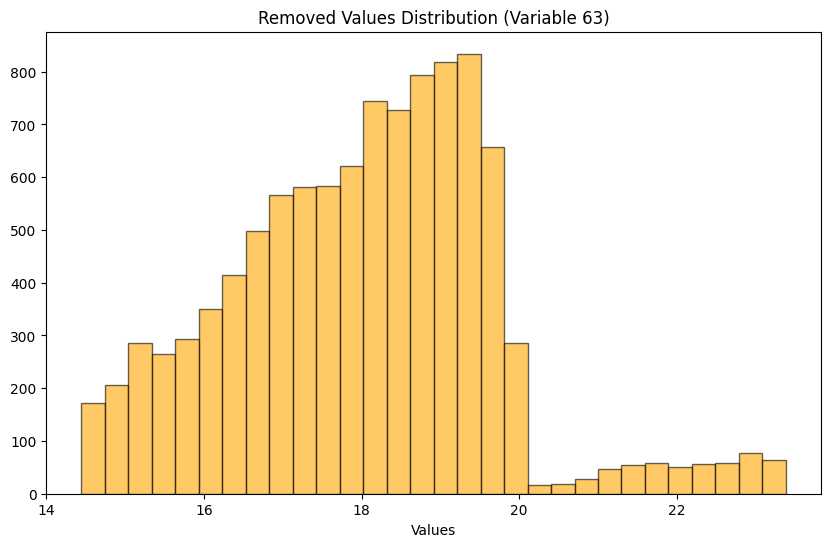

In [27]:
# unnorm_psi = psi * std_psi + mean_psi

# plt.figure(figsize=(10, 6))
# plt.hist(real_data[:unnorm_psi.shape[0], 1, 63], bins=100, color='red', alpha=0.6, label='Real Data', edgecolor='black')
# plt.hist(unnorm_psi[:, 63], bins=100, color='black', alpha=0.6, label='Finetuned Data', edgecolor='black')
# plt.xlabel('Zonal Wind (m/s)', fontsize=14)
# plt.ylabel('Frequency', fontsize=14)
# plt.title('Probability Distribution Function (PDF) of Zonal Wind', fontsize=16)
# plt.axvline(np.mean(unnorm_psi[:, 63]), color='black', linestyle='--', label=f'Mean: {np.mean(unnorm_psi[:, 63]):.2f}')
# plt.axvline(np.mean(real_data[:unnorm_psi.shape[0], 1, 63]), color='red', linestyle='--', label=f'Real Mean: {np.mean(real_data[:unnorm_psi.shape[0], 1, 63]):.2f}')
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.legend(fontsize=12)
# plt.tight_layout()
# plt.show()

removed_values = real_data[indices_removal, 1, 63]
plt.figure(figsize=(10, 6))
plt.hist(removed_values, bins=30, alpha=0.6, color='orange', edgecolor='black')
plt.title('Removed Values Distribution (Variable 63)')
plt.xlabel('Values')

## Training Script

In [ ]:
num_neurons_lst = [1024]
for num_neurons in num_neurons_lst:
    # print(f"USING num_neurons COEF OF {num_neurons}")

    run = wandb.init(entity="fabio2-the-university-of-chicago", project="ssw_research",
            config={
            "architecture": "VAE",
            "dataset": "Holton-Mass",
            "Finetuning": restore,
            "batch_size": batch_size,
            "Neurons @ Deep layer" : num_neurons_lst,
            "latent_dim size" : latent_dim,
            "learning_rate": learning_rate,
            "epochs": num_epochs,
            "KL list" : KL_annealing,
            "KL range and # of cycles" : [kl_range[0], kl_range[1], num_epochs//100] if KL_annealing else KL_weight,
            "Inference length" : time_step,
            },
    )

    best_models         = []
    best_models_saved   = []

    losses_training     = []
    losses_validation   = []

    for cycle in range(0,num_cycles):

        models = []

        # Initialize the model, optimizer, and loss function
        model       = ConditionalVAE(latent_dim, output_dim, condition_dim, num_neurons)
        model       = model.cuda()
        optimizer   = optim.Adam(model.parameters(), lr=learning_rate)
        # print(latent_dim, output_dim, condition_dim)

        # Create the folder structure for saving results
        subfolders  = ['plots','checkpoints']
        folder      = f"{master_folder}/model_at_{cycle}_with_{num_neurons}_neurons_at_{datetime.datetime.now()}"
        os.makedirs(folder)
        for subfolder in subfolders:
            path = os.path.join(folder, subfolder)
            os.mkdir(path)

        # Restore the model if specified
        if restore:
            model_path = "/home/danielboscu/Documents/code/AI_RES/training/best/best_epoch_no_finetune.pth"
            model_restore(model_path, model)
        
        # Training loop
        # Training loop
        for epoch in range(num_epochs):
            for s in normalized_series:
                model.train()
                x, y = s.shape[0], s.shape[1]
                TRAIN_N = int(x * 0.9)
                VAL_N = x - TRAIN_N
                psi_train_input = s[:TRAIN_N, :50]
                psi_train_label = s[1:TRAIN_N+1, :]
                for batch in range (0, TRAIN_N, batch_size):

                    input_batch = psi_train_input[batch:batch + batch_size,:]
                    label_batch = psi_train_label[batch:batch + batch_size,:]

                    optimizer.zero_grad()

                    with autocast(device_type='cuda'):

                        outputs, mus, logvars = zip(*[model(label_batch.float().cuda(non_blocking=True), input_batch.float().cuda(non_blocking=True)) for _ in range(ens_size)])
                        output = torch.stack(outputs)
                        mu = torch.stack(mus)
                        logvar = torch.stack(logvars)

                        reconstruction_loss = F.smooth_l1_loss(output, label_batch.float().cuda(non_blocking=True), reduction="mean")
                        crps_loss = crps_score(output, label_batch.float().cuda(non_blocking=True))
                        kl_loss = 0.5 * (mu ** 2 + torch.exp(logvar) - 1 - logvar).sum() * (beta_kl_coef[epoch] if KL_annealing else KL_weight)

                        # Total loss
                        loss = reconstruction_loss + kl_loss + 0*crps_loss
                        
                    scaler.scale(loss).backward()
                    scaler.step(optimizer)
                    scaler.update()

                if s.shape[0] == normalized_series[-1].shape[0]:
                    losses_training.append(loss.item())
                    print(f'''Epoch {epoch+1}, 
                        Reconstrunction Loss: {reconstruction_loss.item()}
                        KL Loss: {kl_loss.item()}
                        CRPS Loss: {crps_loss.item()}
                        Total Loss: {loss.item()}
                        ''')
                    
                    run.log({"Epoch":epoch+1, "Loss": loss, "Reconstruction Loss": reconstruction_loss, "KL Loss": kl_loss, 
                            "CRPS Loss": crps_loss})

                # Validation Loss
                psi_val_input = s[TRAIN_N:VAL_N, :50]
                psi_val_label = s[TRAIN_N+1:VAL_N+1, :]
                for batch in range (0, VAL_N, batch_size):

                    model.eval()
                    input_batch = psi_val_input[batch:batch + batch_size,:]
                    label_batch = psi_val_label[batch:batch + batch_size,:]

                    with torch.no_grad():
                        with autocast(device_type='cuda'):
                            # print(f"Input batch shape: {input_batch.shape}, Label batch shape: {label_batch.shape}" )
                            # if input_batch.shape[0] != label_batch.shape[0]:
                            #     input_batch =input_batch[:label_batch.shape[0],:]
                            outputs, mus, logvars = zip(*[model(label_batch.float().cuda(non_blocking=True), input_batch.float().cuda(non_blocking=True)) for _ in range(ens_size)])
                            output = torch.stack(outputs)
                            mu = torch.stack(mus)
                            logvar = torch.stack(logvars)

                            val_reconstruction_loss = F.smooth_l1_loss(output, label_batch.float().cuda(non_blocking=True), reduction="mean")
                            val_crps_loss = crps_score(output, label_batch.float().cuda(non_blocking=True))
                            val_kl_loss = 0.5 * (mu ** 2 + torch.exp(logvar) - 1 - logvar).sum() * (beta_kl_coef[epoch] if KL_annealing else KL_weight)                                                                                                                                                                                                                                                                                                                                                                                                                                                 
                    
                    # Total loss
                    val_loss = val_reconstruction_loss + val_kl_loss + 0*val_crps_loss

                if s.shape[0] == normalized_series[-1].shape[0]:
                    losses_validation.append(val_loss.item())
                    print(f'''
                        Validation Reconstruction Loss: {val_reconstruction_loss.item()}
                        Validation KL Loss: {val_kl_loss.item()}
                        Validation CRPS Loss: {val_crps_loss.item()}
                        Validation Total Loss: {val_loss.item()}''')

                    run.log({"Epoch":epoch+1, "Val Loss": val_loss, "Val Reconstruction Loss": val_reconstruction_loss, "Val KL Loss": val_kl_loss, 
                            "Val CRPS Loss": val_crps_loss})
                
            # Inference
            pred = inference(model, psi, time_step, variable_range, variable, 
                             num_variables, latent_dim)

            # Denormalize final preds
            pred_mean = pred[:time_step, :] * std_psi[:, :] + mean_psi[:, :]
            actual_values = real_data[:time_step, 1, :]
            predictions_1d = pred_mean[:, 63]
            
            # Calculate transition durations for predictions
            pred_durations = calculate_transition_durations(predictions_1d, 
                                                            upper_bound, 
                                                            lower_bound)


            # Calculate KL coefficient
            KL_real_data, KL_predictions, avg_norm_KL, l1_diff = KL_coefficient(real_data, 
                                                                           predictions_1d, 
                                                                           num_neurons, 
                                                                           cycle, 
                                                                           KL_by_dim_cycle,
                                                                           L1_by_dim_cycle)
            run.log({"Epoch": epoch+1,"L1 Norm PDF Difference": l1_diff, "KL Divergence": avg_norm_KL, "KL Weight": beta_kl_coef[epoch]})

            # Calculate mean and standard deviation of predictions
            transition_diff_normalized, transition_std_diff_normalized = Mean_and_std_of_predictions(pred_durations, 
                                                                                                     real_durations, 
                                                                                                     num_neurons, cycle,
                                                                                                     transitions_by_dim_cycle,
                                                                                                     transitions_normalized_by_dim_cycle,
                                                                                                     transitions_normalized_std_by_dim_cycle)

            # Initialize variables for exponential fit and range of transitions
            exponential_fit_pred = 0
            duration_diff_normalized = 1

            if len(pred_durations) > 0 and  len(np.unique(pred_durations)) > 1:

                # Calculate the exponential fit for predictions
                x_line_pred = np.linspace(min(pred_durations), max(pred_durations), 100)
                avg_trans_dur = np.mean(pred_durations)
                
                l2_transitions_diff = np.abs((avg_trans_dur-transition_real)/transition_real)
                run.log({"Epoch":epoch+1, "Transition Deviation": l2_transitions_diff})

                exponential_fit_pred = 1/avg_trans_dur
                exp_fit_by_dim_cycle[num_neurons][cycle].append(exponential_fit_pred)
                exp_fit_normalized = normalize_transition_time(exponential_fit_pred, 0.005, exponential_fit_real)
                exp_fit_normalized_by_dim_cycle[num_neurons][cycle].append(exp_fit_normalized)
                # print(f"Exponential Fit Normalized: {exp_fit_normalized:.6f}")

                # Calculate the y-values for the exponential fit
                y_values_pred = exponential_fit_pred*x_line_pred
                
                # Calculate the range of transitions
                max_pred = np.max(pred_durations)
                min_pred = np.min(pred_durations)
                
                if max_pred > 0:

                    # Calculate the predicted range and normalize it
                    difference = abs(max_pred - min_pred)
                    duration_diff_normalized = normalize_transition_time(difference, 10000, abs(np.max(real_durations)-np.min(real_durations)))
                    duration_diff_by_dim_cycle[num_neurons][cycle].append(duration_diff_normalized)
                    # print(f"Duration Difference Normalized: {duration_diff_normalized:.6f}")
                    all_plot(actual_values[:300000, 63],
                                predictions_1d[:300000], 
                                x_line_pred, y_values_pred, 
                                x_line_real, y_values_real, 
                                exponential_fit_pred, exponential_fit_real, avg_norm_KL,
                                exp_fit_normalized, duration_diff_normalized,
                                epoch+1, folder)
                    run.log({"Epoch":epoch+1, "Exp Fit Diff Norm": exp_fit_normalized, "Range Diff Norm": duration_diff_normalized} )
                    
                else:
                    continue
                    # print("No distribution of transitions detected in predictions.")
            else:
                exp_fit_by_dim_cycle[num_neurons][cycle].append(exponential_fit_pred)
                duration_diff_by_dim_cycle[num_neurons][cycle].append(duration_diff_normalized)
                exp_fit_normalized = normalize_transition_time(exponential_fit_pred, 0.005, exponential_fit_real)
                exp_fit_normalized_by_dim_cycle[num_neurons][cycle].append(exp_fit_normalized)
                run.log({"Epoch":epoch+1, "Transition Deviation": np.nan})
                # print("No transitions detected in predictions for exponential fit evaluation.")



            # Calculate accuracy by euclidean distance with specified metrics
            metrics = [exp_fit_normalized, avg_norm_KL, duration_diff_normalized]
            distance = euclidean_distance_for_predictions(metrics)
            run.log({"Epoch":epoch+1, "Euclidean distance": distance})
            
            print(f"Epoch {epoch+1}: Exponential Transition Fit Predictions Normalized: {exp_fit_normalized}, KL Normalized = {avg_norm_KL}, Duration Difference Normalized = {duration_diff_normalized}, Combined Distance = {distance:.6f}")
            
            # Save the model weights at each epoch
            path = f"{folder}/checkpoints/checkpoint_{epoch+1}"
            torch.save(model.state_dict(), path)
            # print(f"Model weights saved to {folder} with point {epoch+1}.")
            models.append(path)

            # Final plots if last epoch
            if epoch == num_epochs - 1:

                folder = os.path.join(folder, "summary")
                if not os.path.exists(folder):
                    os.makedirs(folder)
                # Plot the final average transition plot
                Final_KL_PDF_plot(KL_by_dim_cycle, transition_real, num_neurons, num_cycles, folder)
                
                # Plot the final exponential fit plot
                Final_exp_fit_plot(exp_fit_by_dim_cycle, exponential_fit_real, num_neurons, num_cycles, folder)
        
        Loss_plot(losses_training, losses_validation, cycle, num_neurons, folder)
    
    # Save the best model for the current cycle
    save_best_cycle_epoch(models, num_neurons, cycle, epoch, folder, exp_fit_normalized_by_dim_cycle, 
                            KL_by_dim_cycle, duration_diff_by_dim_cycle,
                            best_models_saved, best_models)
    
    wandb.finish()
    
    # Delete tensors and lists
    del losses_training, losses_validation
    del model, optimizer
    del output, mu, logvar, pred, pred_mean, predictions_1d
    # Add deletes for other tensors like output, mu, logvar, pred
    
    gc.collect()
    gc.collect()
    torch.cuda.empty_cache()
    
    # Optional: Print RAM usage for debugging
    import psutil
    print(f"RAM used: {psutil.virtual_memory().used / (1024 ** 3):.2f} GB")

        
# Save the best model after all cycles
save_best_epoch(best_models, best_models_saved, exp_fit_normalized_by_dim_cycle,
                KL_by_dim_cycle, duration_diff_by_dim_cycle, num_neurons, master_folder)
del best_models, best_models_saved

wandb: Currently logged in as: danielboscu2005 (fabio2-the-university-of-chicago) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Loading model from /home/danielboscu/Documents/code/AI_RES/training/best/best_epoch_no_finetune.pth
Epoch 1, 
                        Reconstrunction Loss: 0.009716571308672428
                        KL Loss: 2.88605679088505e-06
                        CRPS Loss: 10.653337478637695
                        Total Loss: 0.009719457477331161
                        

                        Validation Reconstruction Loss: nan
                        Validation KL Loss: 0.0
                        Validation CRPS Loss: nan
                        Validation Total Loss: nan
Epoch 1: Exponential Transition Fit Predictions Normalized: 0.08660129829407714, KL Normalized = 0.3171028115283834, Duration Difference Normalized = 0.2920628780235125, Combined Distance = 0.439721
Epoch 2, 
                        Reconstrunction Loss: 0.009683625772595406
                        KL Loss: 4.964017989550484e-06
                        CRPS Loss: 10.651134490966797
                        Total Loss: 0.

KeyboardInterrupt: 

Error in callback <bound method _WandbInit._post_run_cell_hook of <wandb.sdk.wandb_init._WandbInit object at 0x74957895abd0>> (for post_run_cell), with arguments args (<ExecutionResult object at 749578936570, execution_count=28 error_before_exec=None error_in_exec= info=<ExecutionInfo object at 749578acf7d0, raw_cell="num_neurons_lst = [1024]
for num_neurons in num_ne.." transformed_cell="num_neurons_lst = [1024]
for num_neurons in num_ne.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/home/danielboscu/Documents/code/AI_RES/scripts/finetuning_hypo_ld_32_beta%20copy.ipynb#X46sZmlsZQ%3D%3D> result=None>,),kwargs {}:


BrokenPipeError: [Errno 32] Broken pipe

In [ ]:
# INFERENCE
# Inference
# Inference
import datetime
import os

# Initialize the model, optimizer, and loss function
latent_dim = 32
output_dim = 75
condition_dim = 50
num_neurons = 1024
model = ConditionalVAE(latent_dim, output_dim, condition_dim, num_neurons)
model = model.cuda()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
start, end = variable_range[variable][0], variable_range[variable][1]+1

# MODIFY THIS LINE FOR MODEL TESTING
past_model = True  # Set to True if you want to load past model weights
if past_model:
    model_weights_path = "/home/danielboscu/Documents/code/AI_RES/training/RCVAE_at_2025-07-16 01:48:45.103680/model_at_0_with_delta_1/checkpoints/checkpoint_1033"
    if os.path.exists(model_weights_path):
        model.load_state_dict(torch.load(model_weights_path))
        print(f"Model weights loaded from {model_weights_path}.")

for _ in range (0,1):

    start, end = variable_range[variable][0], variable_range[variable][1]+1
    initial_cond = torch.reshape(torch.tensor(psi[0,start:end]), [1, num_variables])
    time_step = 300000
    z = torch.zeros([1,latent_dim])
    num_ens = 1
    pred = np.zeros ([time_step, 75, num_ens])

    for k in range (0, time_step):

        for ens in range (0, num_ens):
            if (k ==0):
                z = torch.randn_like(z)
                y = (model.decode(z.float().cuda(non_blocking=True),initial_cond.float().cuda(non_blocking=True))).detach().cpu().numpy()
                pred[k,:,ens] = y
                y_denorm_contracted = (y[:, start:end] * std_psi[:, start:end] + mean_psi[:, start:end])
                initial_cond = torch.tensor((y_denorm_contracted[:, start:end] - mean_psi[:, start:end]) / std_psi[:, start:end])

            else:
                select_ens = np.random.randint(0,num_ens,1)
                z = torch.randn_like(z)
                y = (model.decode(z.float().cuda(non_blocking=True),torch.reshape(torch.tensor(pred[k-1,start:end,select_ens]),[1,num_variables]).float().cuda(non_blocking=True))).detach().cpu().numpy()
                pred[k,:, ens] = y
                y_denorm_contracted = (y[:, start:end] * std_psi[:, start:end] + mean_psi[:, start:end])
                initial_cond = torch.tensor((y_denorm_contracted[:, start:end] - mean_psi[:, start:end]) / std_psi[:, start:end])

    # Denormalize final preds
    pred = pred.reshape(pred.shape[0], pred.shape[1])
    pred_mean = pred[:300000, :] * std_psi[:, :] + mean_psi[:, :]
    
    # Denormalize test labels
    actual_values = psi[:300000, :] * std_psi[:, :] + mean_psi[:, :]

    plt.figure(figsize=(20,8))
    plt.plot(pred_mean[0:60000, 63],'r')
    plt.plot(actual_values[0:60000, 63],'b')
    plt.grid(True)
    plt.title(f"Predictions vs Actual")
    plt.savefig(f'/home/danielboscu/Documents/code/AI_RES/training/prediction_vs_actual_temp.png')

    # MODIFY THIS LINE FOR MODEL TESTING
    np.save(f'/home/danielboscu/Documents/code/AI_RES/training/predictions_RCVAE_temp.npy', pred_mean)